In [109]:
import dask.dataframe as dd

# Φόρτωση του CSV αρχείου με Dask
df = dd.read_csv("data.csv")

# Αν θέλεις να δουλέψεις με Pandas σε μικρότερο κομμάτι του αρχείου
df_sampled = df.sample(frac=0.2).compute()  # Παίρνει το 10% του dataset και το μετατρέπει σε Pandas DataFrame

In [105]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865675 entries, 62630 to 236
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     865675 non-null  object 
 1   Src IP                      865675 non-null  object 
 2   Src Port                    865675 non-null  float64
 3   Dst IP                      865675 non-null  object 
 4   Dst Port                    865675 non-null  int64  
 5   Protocol                    865675 non-null  float64
 6   Timestamp                   865675 non-null  object 
 7   Flow Duration               865675 non-null  float64
 8   Total Fwd Packet            865675 non-null  float64
 9   Total Bwd packets           865675 non-null  float64
 10  Total Length of Fwd Packet  865675 non-null  float64
 11  Total Length of Bwd Packet  865675 non-null  float64
 12  Fwd Packet Length Max       865675 non-null  float64
 13  Fwd Packet Length 

In [111]:
df_sampled["Label"].value_counts()

Label
Malicious    1731113
Benign           243
Name: count, dtype: int64

In [99]:
counts = df_sampled.groupby(['Label', 'Traffic Type']).size().reset_index(name='Counts')
print(counts)

TypeError: FrameBase.reset_index() got an unexpected keyword argument 'name'

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

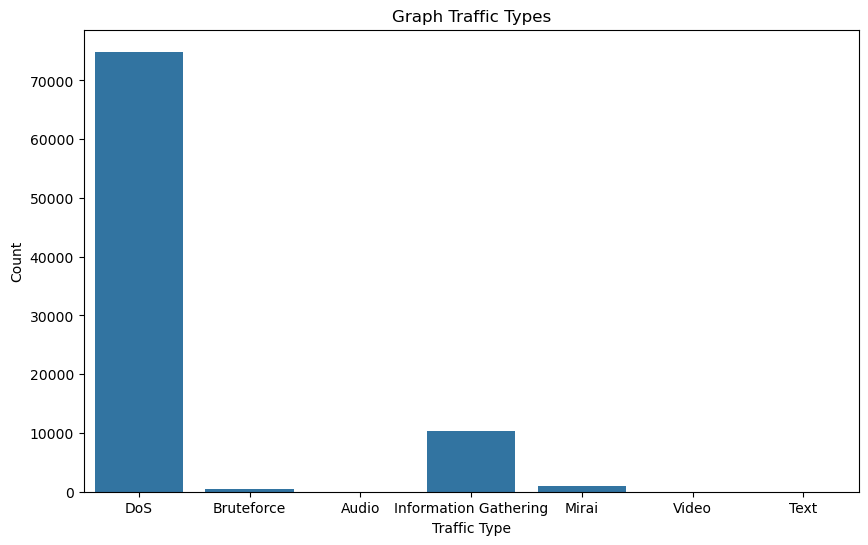

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Type', data=df_sampled)
plt.title('Graph Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')

plt.show()

In [23]:
counts2 = df_sampled.groupby(['Label', 'Traffic Subtype']).size().reset_index(name='Counts2')
print(counts2)

        Label        Traffic Subtype  Counts2
0      Benign                  Audio        3
1      Benign                   Text        1
2      Benign             Video HTTP        3
3      Benign              Video RTP        3
4   Malicious         Bruteforce DNS      225
5   Malicious         Bruteforce FTP       47
6   Malicious        Bruteforce HTTP        4
7   Malicious         Bruteforce SSH       46
8   Malicious      Bruteforce Telnet       59
9   Malicious                DoS ACK     9393
10  Malicious                DoS CWR     8774
11  Malicious                DoS ECN     8682
12  Malicious                DoS FIN     7186
13  Malicious               DoS HTTP      814
14  Malicious                DoS PSH     9076
15  Malicious                DoS RST    10682
16  Malicious                DoS SYN     8628
17  Malicious                DoS UDP     2569
18  Malicious                DoS URG     9091
19  Malicious  Information Gathering    10392
20  Malicious         Mirai DDoS A

In [25]:
packet1 = df_sampled[['Fwd Packet Length Max','Fwd Packet Length Min','Bwd Packet Length Max','Bwd Packet Length Min','Packet Length Mean','Packet Length Std',]]

In [27]:
pd.pivot_table(df_sampled , index = 'Label', values = packet1)

,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std
Label,,,,,,
Benign,682.600000,0.000000,525.900000,145.600000,303.056781,154.833139
Malicious,3.950369,0.373333,305.519005,291.235391,243.565378,105.023515


In [31]:
packet2 = df_sampled[['Protocol','Src Port','Dst Port', 'Flow Duration','Flow Bytes/s', 'Flow Packets/s','Flow IAT Max','Flow IAT Min']]

In [33]:
pd.pivot_table(df_sampled , index = 'Label', values = packet2)

,Dst Port,Flow Bytes/s,Flow Duration,Flow IAT Max,Flow IAT Min,Flow Packets/s,Protocol,Src Port
Label,,,,,,,,
Benign,29820.600000,78170.499438,5.193297e+07,3.292335e+06,1.908068e+06,9631.282963,9.300000,52353.40000
Malicious,4049.081391,3554.335184,8.932113e+06,6.637318e+06,2.961416e+06,170.433063,6.425645,25649.15221


In [35]:
packet3 = df_sampled[['SYN Flag Count','ACK Flag Count','RST Flag Count','PSH Flag Count','FIN Flag Count']]

In [37]:
pd.pivot_table(df_sampled , index = 'Label', values = packet3)

,ACK Flag Count,FIN Flag Count,PSH Flag Count,RST Flag Count,SYN Flag Count
Label,,,,,
Benign,4910.800000,0.400000,2603.200000,0.300000,0.800000
Malicious,0.918459,0.173306,0.296414,0.989545,0.250918


In [39]:
df_sampled.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,86568.000000,86568.000000,86568.000000,8.656800e+04,86568.000000,86568.000000,8.656800e+04,8.656800e+04,86568.000000,86568.000000,...,86568.000000,86568.000000,8.656800e+04,8.656800e+04,8.656800e+04,8.656800e+04,8.656800e+04,8.656800e+04,8.656800e+04,8.656800e+04
mean,25652.236981,4052.058417,6.425977,8.937080e+06,5.638354,1.061813,8.414608e+02,2.754359e+02,305.544462,291.218568,...,1.130452,21.231956,2.882634e+05,1.674593e+04,3.026160e+05,2.755294e+05,5.747042e+06,5.655051e+05,6.224968e+06,5.326834e+06
std,20065.493760,12701.173131,2.123177,1.316100e+07,631.653846,59.371067,5.598750e+04,7.111748e+04,371.418954,363.806239,...,46.699096,6.098061,1.032553e+06,2.436328e+05,1.120167e+06,9.842054e+05,8.700145e+06,2.369444e+06,9.470942e+06,8.327205e+06
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6365.000000,0.000000,6.000000,5.016175e+04,1.000000,0.000000,5.000000e+01,0.000000e+00,50.000000,50.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,22219.500000,0.000000,6.000000,3.049046e+06,2.000000,1.000000,1.300000e+02,0.000000e+00,50.000000,50.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,42431.000000,0.000000,6.000000,1.203049e+07,2.000000,1.000000,1.000000e+03,0.000000e+00,500.000000,500.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.989416e+06,0.000000e+00,1.006674e+07,9.232495e+06
max,65535.000000,65530.000000,17.000000,1.199896e+08,155228.000000,15571.000000,1.645923e+07,2.085080e+07,1368.000000,1368.000000,...,12393.000000,44.000000,5.240382e+07,3.887061e+07,7.988949e+07,4.014653e+07,1.109030e+08,7.233002e+07,1.110069e+08,1.109030e+08


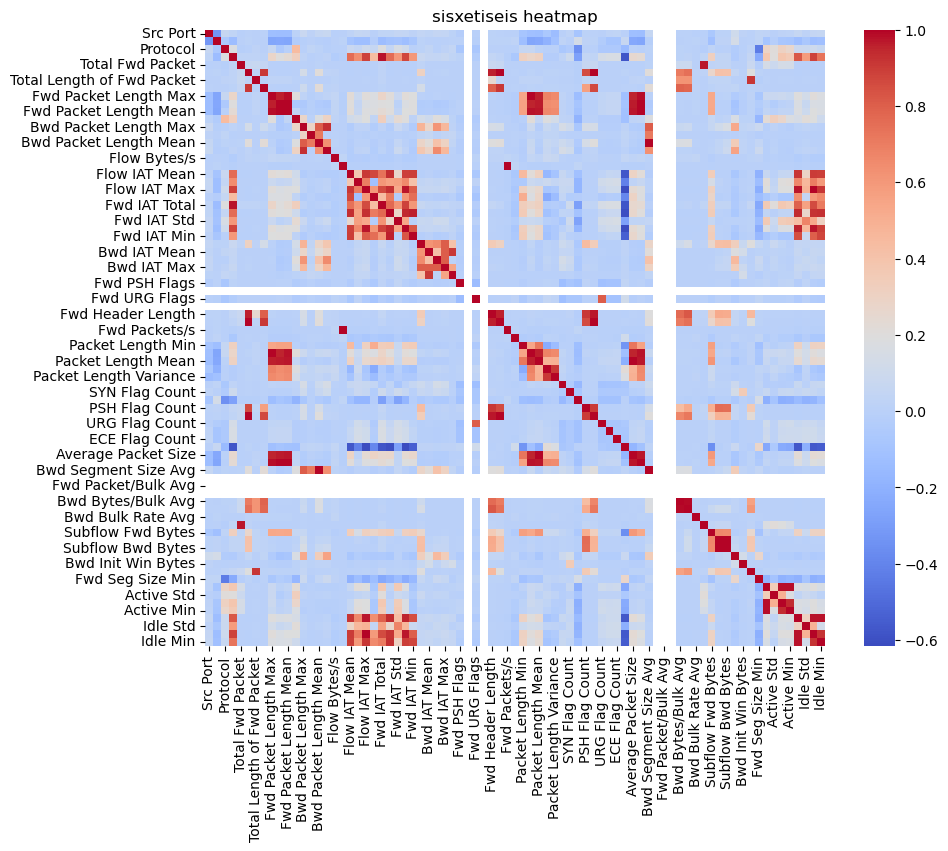

In [43]:
df_heat = df_sampled.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(df_heat, cmap='coolwarm', annot=False)
plt.title('sisxetiseis heatmap')
plt.show()

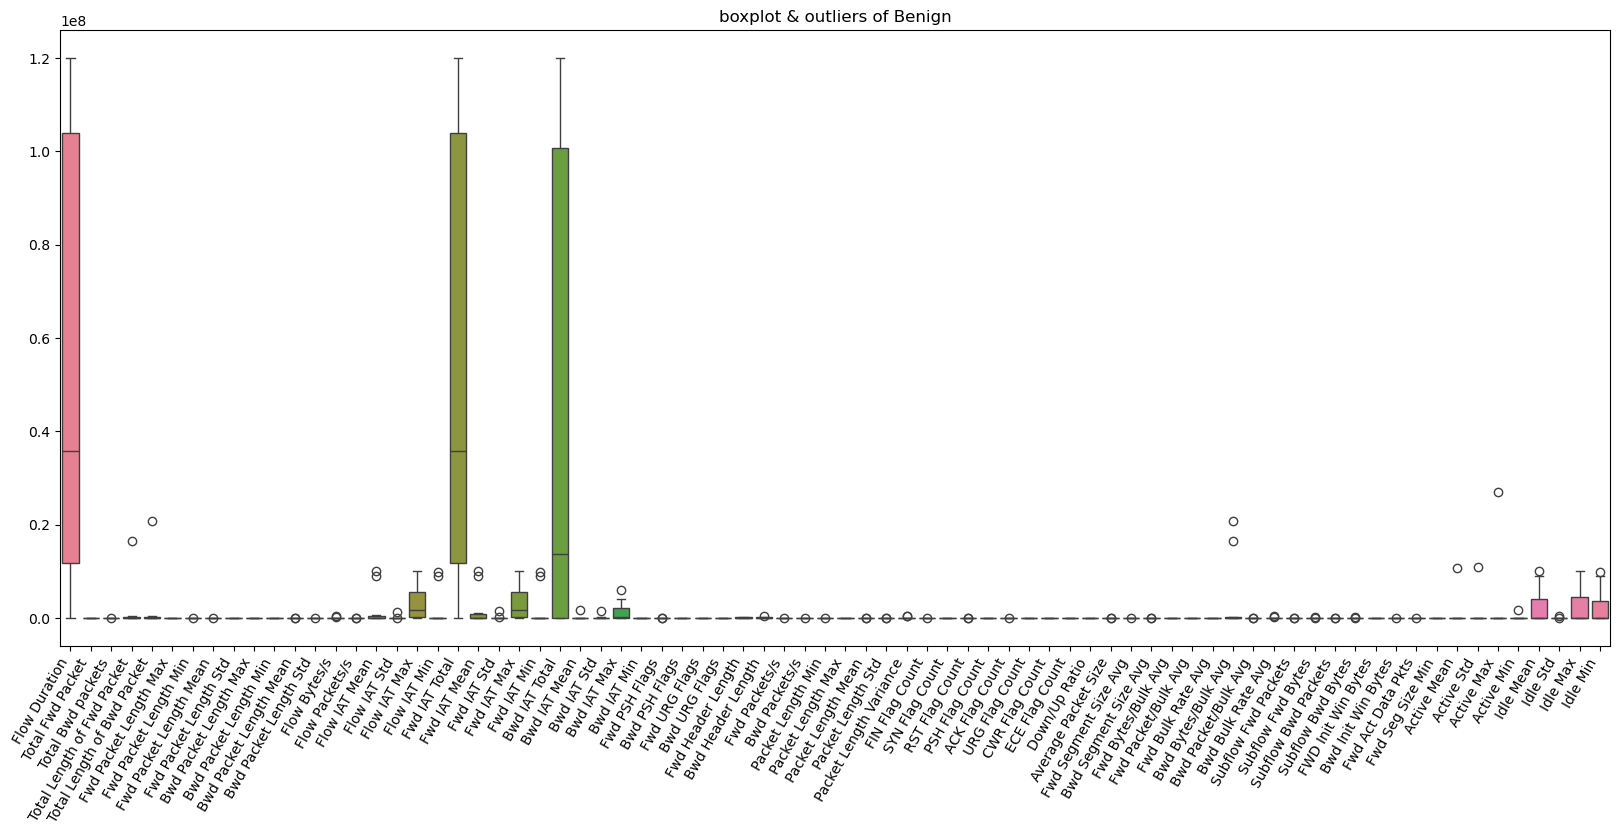

In [45]:
benign_df = df_sampled[df_sampled['Label'] == 'Benign']
#σβηνω τις στηλες που δεν περιεχουν αριθμητικες τιμες καθως δεν ειναι χρησιμες στην ευρεση outliers
benign_df = benign_df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol',
                                    'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

plt.figure(figsize=(20, 8))
sns.boxplot(data=benign_df)
plt.xticks(rotation=60, ha='right', fontsize=10)  
plt.title('boxplot & outliers of Benign')
plt.show()

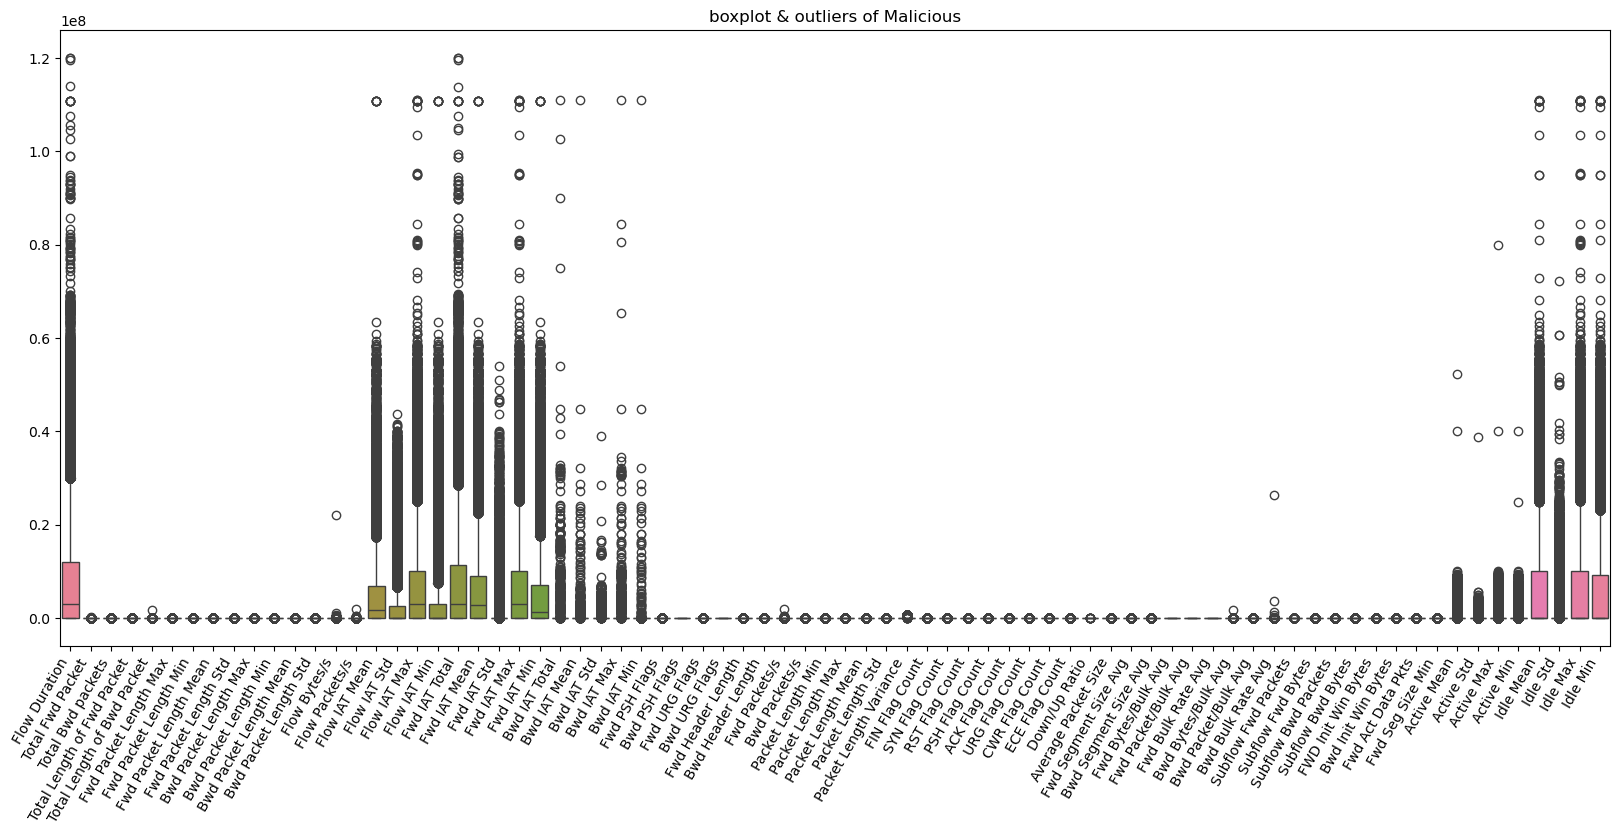

In [47]:
Malicious_df = df_sampled[df_sampled['Label'] == 'Malicious']
#σβηνω τις στηλες που δεν περιεχουν αριθμητικες τιμες καθως δεν ειναι χρησιμες στην ευρεση outliers
Malicious_df = Malicious_df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol',
                                    'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

plt.figure(figsize=(20, 8))
sns.boxplot(data=Malicious_df)
plt.xticks(rotation=60, ha='right', fontsize=10)  
plt.title('boxplot & outliers of Malicious')
plt.show()

In [49]:
df_sampled['Label'] = df_sampled['Label'].apply(lambda x: 1 if x == 'Malicious' else 0)

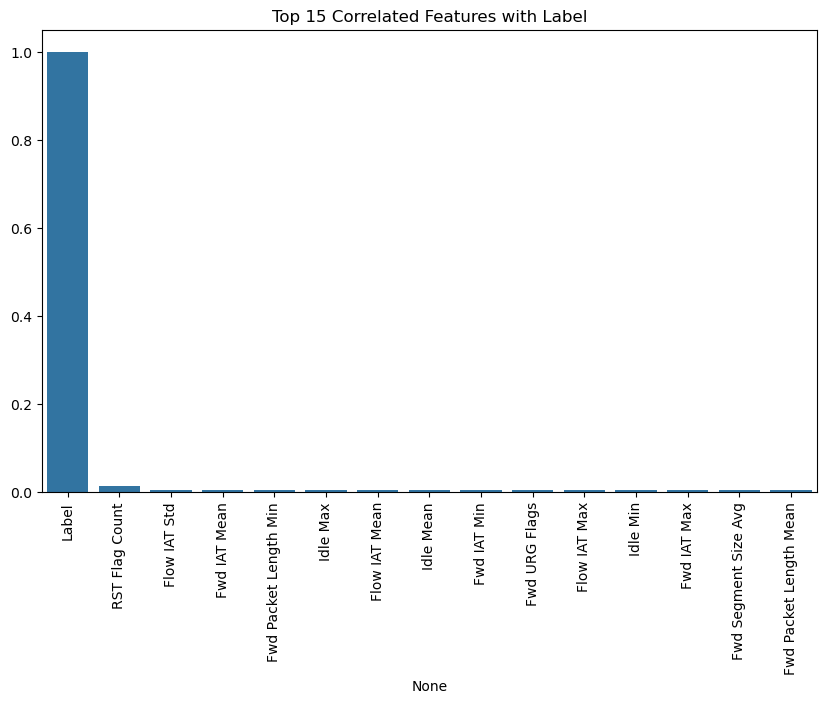

Label                     1.000000
RST Flag Count            0.013139
Flow IAT Std              0.004760
Fwd IAT Mean              0.004691
Fwd Packet Length Min     0.004302
Idle Max                  0.004211
Flow IAT Mean             0.004173
Idle Mean                 0.004081
Fwd IAT Min               0.003986
Fwd URG Flags             0.003945
Flow IAT Max              0.003885
Idle Min                  0.003767
Fwd IAT Max               0.003698
Fwd Segment Size Avg      0.003544
Fwd Packet Length Mean    0.003544
URG Flag Count            0.003176
ECE Flag Count            0.002936
CWR Flag Count            0.002928
Fwd IAT Std               0.002796
Idle Std                  0.002359
Name: Label, dtype: float64


In [51]:
numeric_df = df_sampled.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Label'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index[:15], y=correlation.values[:15])
plt.xticks(rotation=90)
plt.title("Top 15 Correlated Features with Label")
plt.show()

# Εκτύπωση των top 10 πιο σχετικών στηλών
print(correlation.head(20))

In [53]:
features = ['Label','RST Flag Count','Fwd Seg Size Min','Fwd URG Flags','URG Flag Count',
           'ECE Flag Count','CWR Flag Count','Bwd Init Win Bytes','Fwd IAT Min',
           'FIN Flag Count','SYN Flag Count','ACK Flag Count','PSH Flag Count',
            'Bwd Packet Length Max','Bwd Packet Length Min','Fwd Packet Length Max',
            'Fwd Packet Length Min','Packet Length Mean','Packet Length Std','Traffic Type',
           'Traffic Subtype']
df_new = df_sampled[features]

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86568 entries, 0 to 86567
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  86568 non-null  int64  
 1   RST Flag Count         86568 non-null  float64
 2   Fwd Seg Size Min       86568 non-null  float64
 3   Fwd URG Flags          86568 non-null  float64
 4   URG Flag Count         86568 non-null  float64
 5   ECE Flag Count         86568 non-null  float64
 6   CWR Flag Count         86568 non-null  float64
 7   Bwd Init Win Bytes     86568 non-null  float64
 8   Fwd IAT Min            86568 non-null  float64
 9   FIN Flag Count         86568 non-null  float64
 10  SYN Flag Count         86568 non-null  float64
 11  ACK Flag Count         86568 non-null  float64
 12  PSH Flag Count         86568 non-null  float64
 13  Bwd Packet Length Max  86568 non-null  float64
 14  Bwd Packet Length Min  86568 non-null  float64
 15  Fw

In [57]:
df_new.head()

,Label,RST Flag Count,Fwd Seg Size Min,Fwd URG Flags,URG Flag Count,ECE Flag Count,CWR Flag Count,Bwd Init Win Bytes,Fwd IAT Min,FIN Flag Count,...,ACK Flag Count,PSH Flag Count,Bwd Packet Length Max,Bwd Packet Length Min,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Mean,Packet Length Std,Traffic Type,Traffic Subtype
0,1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2956633.0,0.0,...,0.0,0.0,0.0,0.0,500.0,50.0,371.428571,219.577516,DoS,DoS UDP
1,1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,462758.0,0.0,...,0.0,0.0,0.0,0.0,500.0,50.0,200.000000,232.379001,DoS,DoS UDP
2,1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,22900498.0,0.0,...,0.0,0.0,51.0,40.0,51.0,40.0,46.600000,6.024948,Bruteforce,Bruteforce DNS
3,1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2957583.0,0.0,...,0.0,0.0,0.0,0.0,1368.0,50.0,495.428571,439.370329,DoS,DoS UDP
4,1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1250979.0,0.0,...,0.0,0.0,0.0,0.0,500.0,50.0,307.142857,240.535118,DoS,DoS UDP


In [59]:
df_new["Label"].value_counts()

Label
1    86558
0       10
Name: count, dtype: int64

In [61]:
#metatropi stilis type se numerical apo object
df_new["Label"] = df_new["Label"].astype(str).str[-2:]

unique_list_3 = sorted(df_new["Label"].unique())
mapping_3 = {item: idx for idx, item in enumerate(unique_list_3)}

df_new["Label"] = df_new["Label"].map(mapping_3)
print(mapping_3)

{'0': 0, '1': 1}


C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\1964582485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Label"] = df_new["Label"].astype(str).str[-2:]
C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\1964582485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Label"] = df_new["Label"].map(mapping_3)


In [63]:
#metatropi stilis type se numerical apo object
df_new["Traffic Type"] = df_new["Traffic Type"].astype(str).str[-2:]

unique_list = sorted(df_new["Traffic Type"].unique())
mapping = {item: idx for idx, item in enumerate(unique_list)}

df_new["Traffic Type"] = df_new["Traffic Type"].map(mapping)
print(mapping)

{'ai': 0, 'ce': 1, 'eo': 2, 'io': 3, 'ng': 4, 'oS': 5, 'xt': 6}


C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\4226910204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Type"] = df_new["Traffic Type"].astype(str).str[-2:]
C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\4226910204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Type"] = df_new["Traffic Type"].map(mapping)


In [65]:
#metatropi stilis subtype apo object se numerical
df_new["Traffic Subtype"] = df_new["Traffic Subtype"].astype(str).str[-3:]

unique_list_2 = sorted(df_new["Traffic Subtype"].unique())
mapping_2 = {item: idx for idx, item in enumerate(unique_list_2)}

df_new["Traffic Subtype"] = df_new["Traffic Subtype"].map(mapping_2)
print(mapping_2)

{'ACK': 0, 'CWR': 1, 'DNS': 2, 'ECN': 3, 'ETH': 4, 'FIN': 5, 'FTP': 6, 'PSH': 7, 'RST': 8, 'RTP': 9, 'SSH': 10, 'SYN': 11, 'TTP': 12, 'UDP': 13, 'URG': 14, 'dio': 15, 'ext': 16, 'ing': 17, 'net': 18, 'rce': 19}


C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\3398298600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Subtype"] = df_new["Traffic Subtype"].astype(str).str[-3:]
C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\3398298600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Traffic Subtype"] = df_new["Traffic Subtype"].map(mapping_2)


In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86568 entries, 0 to 86567
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  86568 non-null  int64  
 1   RST Flag Count         86568 non-null  float64
 2   Fwd Seg Size Min       86568 non-null  float64
 3   Fwd URG Flags          86568 non-null  float64
 4   URG Flag Count         86568 non-null  float64
 5   ECE Flag Count         86568 non-null  float64
 6   CWR Flag Count         86568 non-null  float64
 7   Bwd Init Win Bytes     86568 non-null  float64
 8   Fwd IAT Min            86568 non-null  float64
 9   FIN Flag Count         86568 non-null  float64
 10  SYN Flag Count         86568 non-null  float64
 11  ACK Flag Count         86568 non-null  float64
 12  PSH Flag Count         86568 non-null  float64
 13  Bwd Packet Length Max  86568 non-null  float64
 14  Bwd Packet Length Min  86568 non-null  float64
 15  Fw

In [69]:
#epilegw to 35% twn data gia na ftiaksw ena kainourgio df me deigmatolipsia
df_deigma = df_new.sample(frac=0.35, random_state=42)

In [71]:
print(df_deigma["Label"].value_counts())

Label
1    30296
0        3
Name: count, dtype: int64


In [73]:
from sklearn.cluster import DBSCAN

# ekpedefsi dbscan
dbscan = DBSCAN(eps=1.5, min_samples=10).fit(df_new.drop(columns=['Label'])) #an se mia aktina eps=1.5 uparxoyn toulax 10 samples to simio 
#theoritai pukno kai dimiourgitai ena cluster-etiketa gia afto. allios theoritai thorivos kai agnoeitai.

# prosthiki olwn twn clusters sto df
df_new['Cluster'] = dbscan.labels_

# diatirisi twn data apo pio puknes perioxes
df_dbscan = df_new[df_new['Cluster'] != -1]  # afairoume ta outliers (-1) opoia den exoun etiketa cluster dld kai theoroude araia simia i thorivos
df_dbscan = df_dbscan.drop(columns=['Cluster']) #diagrafi tis stilis cluster afou den xreiazetai

C:\Users\vassi\AppData\Local\Temp\ipykernel_23616\1354481039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster'] = dbscan.labels_


In [75]:
print(df_dbscan["Label"].value_counts())

Label
1    37316
Name: count, dtype: int64
